In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Spray Dataframe Exploratory Analysis

In [2]:
## Now i am importing the spray dataframe and printing out some characteristics
## of this dataframe
train_df = pd.read_csv('/Users/TerryONeill/west_nile/west_nile/assets/train.csv')
spray_df = pd.read_csv('/Users/TerryONeill/west_nile/west_nile/assets/spray.csv')
print 'size of dataframe:\n', spray_df.shape
print
print 'datatypes:\n', spray_df.dtypes
print
print 'null values:\n', spray_df.isnull().sum()  ## you can see we have some nulls here

size of dataframe:
(14835, 4)

datatypes:
Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

null values:
Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64


In [3]:
## now the head of this dataframe
spray_df.head()


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
## I am importing the training data here so that we can use it along with the spray data

# checking to see how many traps there were total
print 'Number of Total Traps:\n', train_df.Trap.nunique()

print
# This will show me how many times westnile was present when a trap was checked (1 is present)
print 'Number of Trap Tests with West Nile Present:\n', train_df['WnvPresent'].value_counts()

print
## printing the head to get a sense of the layout of the dataframe
train_df.head()

Number of Total Traps:
136

Number of Trap Tests with West Nile Present:
0    9955
1     551
Name: WnvPresent, dtype: int64



,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
## we can see there are 10 distinct dates where a spray occured

spray_df.Date.nunique()

10

In [6]:
## although there were only 10 distinct days, there were 8583 distinct moments on 
## those days where a spray occured

spray_df.Time.nunique()

8583

In [7]:
### THE FOLLOWING CODE IS BEING USED TO PLOT COORDINATES OF CHICAGO MATCHING THE AREA WE
### ARE LOOKING AT IN ORDER TO PLOT POINTS WHERE SPRAYS OCCURED AND TRAPS THAT HAD AT LEAST
### ONE SAMPLE TEST POSITIVE FOR WEST NILE

from pymongo import *
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from collections import Counter
import ast

def routes_map():
    """  

    doesn't work :(
    # map of chicago
    """ 
    #all_locations = [zip(spray_df.Latitude, spray_df.Longitude)]#<-- this is the example data above
    x = [spray_df.Latitude]
    y = [spray_df.Longitude]

#     for loc in all_locations:     #creates two lists for the x and y (lat,lon) coordinates
#         x.append(float(loc[1]))
#         y.append(float(loc[0]))

    # llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
    # are the lat/lon values of the lower left and upper right corners
    # of the map.
    # resolution = 'i' means use intermediate resolution coastlines.
    # lon_0, lat_0 are the central longitude and latitude of the projection.
    #loc = [41.8709, -87.6331]
    
    plt.figure(figsize = (30, 30))
    # setup Lambert Conformal basemap.
    m = Basemap(llcrnrlon=-87.938515,llcrnrlat=41.6443349,urcrnrlon=-87.524044,urcrnrlat=42.068155456,
                projection='cyl',resolution='h')
    # draw coastlines.
    m.drawcoastlines()
    m.drawstates()
    m.drawrivers()
    m.drawcounties()
    m.drawcountries()
    m.drawstates()
    m.arcgisimage()
    

    # draw a boundary around the map, fill the background.
    # this background will end up being the ocean color, since
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='white')

    x1, y1 = m(x[:100],y[:100])
    m.scatter(spray_df.Longitude,spray_df.Latitude,marker="o", color = 'red', s = 5)
    m.scatter(train_df[train_df['WnvPresent']==1].Longitude, train_df[train_df['WnvPresent']==1].Latitude, marker = 's', color = 'white', s = 100)
    m.scatter(x = -87.933, y = 41.995, marker = '*', color = 'blue', s = 10000)
    m.scatter(x =  -87.752, y = 41.786, marker = '*', color = 'blue', s = 10000)
    plt.title("City of Chicago Bus Stops")

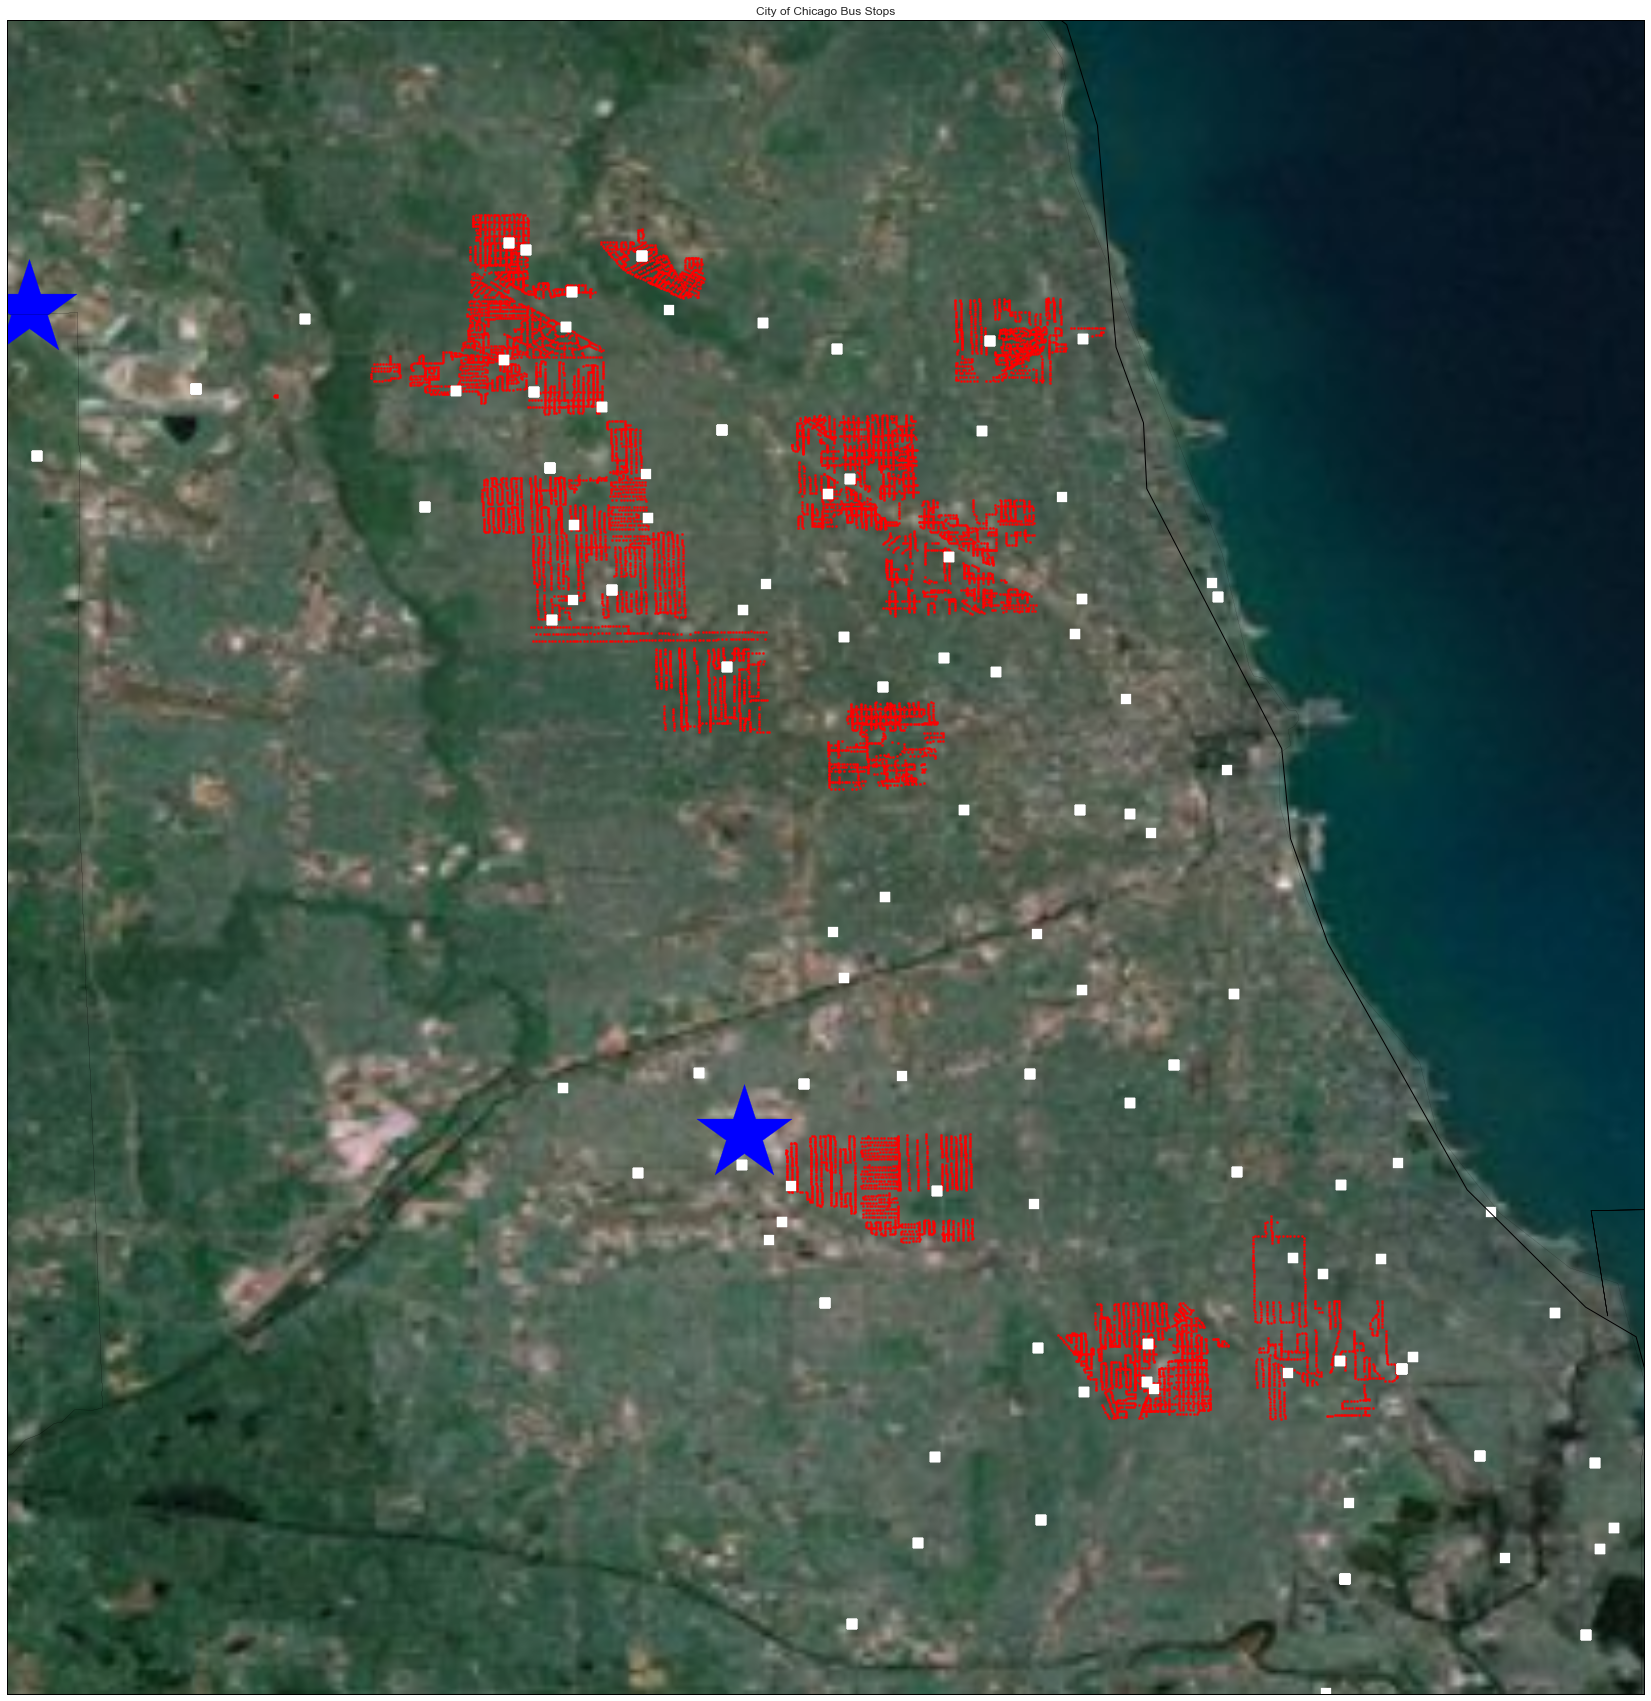

In [8]:
routes_map()

In [9]:
spray_df.Date.value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [10]:
spray_df['fulldate'] = spray_df['Date'] + ' ' + spray_df['Time']

spray_df['fulldate'] = pd.to_datetime(spray_df['fulldate'])
spray_df.head()

,Date,Time,Latitude,Longitude,fulldate
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29 18:56:58
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29 18:57:08
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29 18:57:18
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29 18:57:28
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29 18:57:38


In [11]:
spray_df['Date'] = pd.to_datetime(spray_df['Date'])

#spray_df.set_index('Date', inplace = True)

spray_df.head()

,Date,Time,Latitude,Longitude,fulldate
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29 18:56:58
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29 18:57:08
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29 18:57:18
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29 18:57:28
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29 18:57:38


In [12]:
#spray_df['Time'] = pd.to_datetime(spray_df['Time'])

In [13]:
## I am creating the engine that connects psql with my newly created database (west_nile)
## so that i can export the dataframes as tables

from sqlalchemy import create_engine
import psycopg2

engine = create_engine('postgresql://TerryONeill@localhost:5432/west_nile')

In [14]:
## this is adding the dataframe to my newly created database in psql as
## a table named 'whatever the first parameter is'
spray_df.to_sql('spray', engine)

## an error might get kicked up here since a table has already been created, that 
## is fine for us, just ignore the error. If you alter the dataframe then you need
## to delete the table in psql and then recreate it

ValueError: Table 'spray' already exists.